# BERT-based Models应用模型 


## BertForPreTraining: MLM & NSP

In [1]:
from transformers import BertTokenizer, BertForPreTraining
import torch

In [2]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForPreTraining.from_pretrained('bert-base-uncased')

Some weights of BertForPreTraining were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['cls.predictions.decoder.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [12]:
sentences = [
    ['Hello, my dog is cute. ', 'I like it'],
    ['Hello, my cat is cute. ', 'I like it so much']
]

In [35]:
inputs = tokenizer(*sentences[0], padding=True, return_tensors='pt')

In [36]:
inputs

{'input_ids': tensor([[  101,  7592,  1010,  2026,  3899,  2003, 10140,  1012,   102,  1045,
          2066,  2009,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [37]:
outputs = model(**inputs)

In [38]:
prediction_logits = outputs.prediction_logits

In [39]:
prediction_logits.shape

torch.Size([1, 13, 30522])

In [40]:
seq_relationship_logits = outputs.seq_relationship_logits

In [41]:
seq_relationship_logits

tensor([[ 5.9950, -5.5033]], grad_fn=<AddmmBackward>)

### BertLMHeadModel  -- Only MLM

In [43]:
from transformers import BertTokenizer, BertLMHeadModel, BertConfig
import torch

In [44]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [45]:
config = BertConfig.from_pretrained("bert-base-uncased")
config.is_decoder = True

In [50]:
model = BertLMHeadModel.from_pretrained('bert-base-uncased', config=config)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertLMHeadModel: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertLMHeadModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertLMHeadModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [47]:
inputs = tokenizer("Hellp, my dog is cute", return_tensors='pt')

In [48]:
inputs

{'input_ids': tensor([[  101,  3109,  2361,  1010,  2026,  3899,  2003, 10140,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [51]:
outputs = model(**inputs)

In [53]:
outputs.logits

tensor([[[ -6.3390,  -6.3664,  -6.4600,  ...,  -5.5355,  -4.1787,  -5.8384],
         [ -6.2403,  -6.2469,  -6.3423,  ...,  -5.5245,  -4.3050,  -4.5278],
         [ -6.4961,  -6.5741,  -6.5669,  ...,  -6.0016,  -4.4028,  -4.8309],
         ...,
         [ -9.0241,  -8.8429,  -9.1135,  ...,  -8.9733,  -7.6501,  -6.0509],
         [ -7.8314,  -7.7269,  -7.9044,  ...,  -7.9816,  -7.3363,  -5.6727],
         [-12.5266, -12.0821, -11.9288,  ...,  -9.5113, -11.1537,  -7.9784]]],
       grad_fn=<AddBackward0>)

### BertForNextSentencePrediction  -- Only NSP

In [55]:
from transformers import BertForNextSentencePrediction

In [56]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForNextSentencePrediction.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForNextSentencePrediction: ['cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForNextSentencePrediction from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForNextSentencePrediction from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [57]:
prompt = 'Hello, my dog is cute. '
next_sentence = 'I like it'

In [58]:
encoding = tokenizer(prompt, next_sentence, return_tensors='pt')

In [59]:
encoding

{'input_ids': tensor([[  101,  7592,  1010,  2026,  3899,  2003, 10140,  1012,   102,  1045,
          2066,  2009,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [60]:
outputs = model(**encoding, labels= torch.LongTensor([1]))

In [62]:
outputs.logits

tensor([[ 5.9950, -5.5033]], grad_fn=<AddmmBackward>)

## BertForSequenceClassification
-- 句子分类的输入为句子（对），输出为单个分类标签  
-- 既可以做分类，也可以做回归任务

In [63]:
from transformers.models.bert.tokenization_bert import BertTokenizer
from transformers.models.bert.modeling_bert import BertForSequenceClassification

In [64]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased-finetuned-mrpc')

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [65]:
model = BertForSequenceClassification.from_pretrained("bert-base-cased-finetuned-mrpc")

Downloading:   0%|          | 0.00/433 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/433M [00:00<?, ?B/s]

In [83]:
classes = ["not paraphrase", 'is paraphrase']

sequence_0 = "The company HuggingFace is based in New York City"
sequence_1 = 'Apples are especially bad for your health'
sequence_2 = "HuggingFace's headquarters are situated in Manhattan"

In [84]:
paraphrase = tokenizer(sequence_0, sequence_2, return_tensors='pt')
not_paraphrase = tokenizer(sequence_0, sequence_1, return_tensors='pt')

paraphrase_classification_logits = model(**paraphrase).logits
not_paraphrase_classification_logits = model(**not_paraphrase).logits

In [89]:
paraphrase_results = torch.softmax(paraphrase_classification_logits, dim=1).tolist()[0]
not_paraphrase_results = torch.softmax(not_paraphrase_classification_logits, dim=1).tolist()[0]

In [90]:
for _class, _prob in zip(classes, paraphrase_results):
    print(f"{_class}: {int(round(_prob * 100))}%")

not paraphrase: 10%
is paraphrase: 90%


In [91]:
for _class, _prob in zip(classes, not_paraphrase_results):
    print(f"{_class}: {int(round(_prob * 100))}%")

not paraphrase: 94%
is paraphrase: 6%


## BertForMultipleChoice

这一模型用于多项选择，如 RocStories/SWAG 任务。

多项选择任务的输入为一组分次输入的句子，输出为选择某一句子的单个标签。 结构上与句子分类相似，只不过线性层输出维度为 1，即每次需要将每个样本的多个句子的输出拼接起来作为每个样本的预测分数。  
实际上，具体操作时是把每个 batch 的多个句子一同放入的，所以一次处理的输入为[batch_size, num_choices]数量的句子，因此相同 batch 大小时，比句子分类等任务需要更多的显存，在训练时需要小心。

## BertForTokenClassification

-- 用于序列标注（词分类），如NER任务  
-- 输入：单个句子文本  
-- 输出：每个token对应的标签  

In [92]:
from transformers import BertForTokenClassification

In [93]:
model = BertForTokenClassification.from_pretrained("dbmdz/bert-large-cased-finetuned-conll03-english")

Downloading:   0%|          | 0.00/998 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

In [94]:
label_list = ["O", "B-MISC",  "I-MISC", "B-PER","I-PER", "B-ORG", "I-ORG", "B-LOC", "I-LOC"]

In [95]:
sequence = "Hugging Face Inc. is a company based in New York City. \
Its headquarters are in DUMBO, therefore very close to the Manhattan Bridge."

In [96]:
# Bit of a hack to get the tokens with the special tokens
tokens = tokenizer.tokenize(tokenizer.decode(tokenizer.encode(sequence)))

In [98]:
inputs = tokenizer.encode(sequence, return_tensors='pt')

In [99]:
outputs = model(inputs).logits

In [101]:
predictions = torch.argmax(outputs, dim=2)

In [102]:
for token, prediction in zip(tokens, predictions[0].numpy()):
    print((token, model.config.id2label[prediction]))

('[CLS]', 'O')
('Hu', 'I-ORG')
('##gging', 'I-ORG')
('Face', 'I-ORG')
('Inc', 'I-ORG')
('.', 'O')
('is', 'O')
('a', 'O')
('company', 'O')
('based', 'O')
('in', 'O')
('New', 'I-LOC')
('York', 'I-LOC')
('City', 'I-LOC')
('.', 'O')
('Its', 'O')
('headquarters', 'O')
('are', 'O')
('in', 'O')
('D', 'I-LOC')
('##UM', 'I-LOC')
('##BO', 'I-LOC')
(',', 'O')
('therefore', 'O')
('very', 'O')
('close', 'O')
('to', 'O')
('the', 'O')
('Manhattan', 'I-LOC')
('Bridge', 'I-LOC')
('.', 'O')
('[SEP]', 'O')


## BertForQuestionAnswering

--输入：问题+答案组成的句子对  
--输出：起始位置和结束位置，用于标出回答中的具体文本

In [103]:
from transformers import AutoTokenizer, AutoModelForQuestionAnswering

In [104]:
tokenizer = AutoTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

Downloading:   0%|          | 0.00/443 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

In [106]:
model = AutoModelForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

Downloading:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

In [108]:
text = """🤗 Transformers (formerly known as pytorch-transformers and pytorch-pretrained-bert) 
provides general-purpose architectures (BERT, GPT-2, RoBERTa, XLM, DistilBert, XLNet…) for 
Natural Language Understanding (NLU) and Natural Language Generation (NLG) with over 32+ 
pretrained models in 100+ languages and deep interoperability between TensorFlow 2.0 and PyTorch."""

In [109]:
questions = [
"How many pretrained models are available in 🤗 Transformers?",
"What does 🤗 Transformers provide?",
"🤗 Transformers provides interoperability between which frameworks?",
]

In [111]:
for question in questions:
    inputs = tokenizer(question, text, add_special_tokens=True, return_tensors='pt')
    input_ids = inputs["input_ids"].tolist()[0]
    outputs = model(**inputs)
    answer_start_scores = outputs.start_logits
    answer_end_scores = outputs.end_logits
    answer_start = torch.argmax(
        answer_start_scores
    )
    answer_end = torch.argmax(answer_end_scores) + 1
    answer = tokenizer.convert_tokens_to_string(
        tokenizer.convert_ids_to_tokens(input_ids[answer_start:answer_end])
    )
    print(f"Question:{question}")
    print(f"Answer:{answer}")

Question:How many pretrained models are available in 🤗 Transformers?
Answer:over 32 +
Question:What does 🤗 Transformers provide?
Answer:general - purpose architectures
Question:🤗 Transformers provides interoperability between which frameworks?
Answer:tensorflow 2. 0 and pytorch


# BERT训练和优化

## Pre-Training

预训练阶段，除了众所周知的 15%、80% mask 比例，有一个值得注意的地方就是参数共享。 不止 BERT，所有 huggingface 实现的 PLM 的 word embedding 和 masked language model 的预测权重在初始化过程中都是共享的

## Fine-Tuning

### AdamW

L2 正则化和权重衰减在大部分情况下并不等价，只在 SGD 优化的情况下是等价的；而大多数框架中对于 Adam+L2 正则使用的是权重衰减的方式，两者不能混为一谈。  
AdamW 是在 Adam+L2 正则化的基础上进行改进的算法  
通常，我们会选择模型的 weight 部分参与 decay 过程，而另一部分（包括 LayerNorm 的 weight）不参与

### Warmup

在训练初期使用较小的学习率（从 0 开始），在一定步数（比如 1000 步）内逐渐提高到正常大小（比如上面的 2e-5），避免模型过早进入局部最优而过拟合；

* 在训练后期再慢慢将学习率降低到 0，避免后期训练还出现较大的参数变化。
* 在 Huggingface 的实现中，可以使用多种 warmup 策略

```python
TYPE_TO_SCHEDULER_FUNCTION = {
    SchedulerType.LINEAR: get_linear_schedule_with_warmup,
    SchedulerType.COSINE: get_cosine_schedule_with_warmup,
    SchedulerType.COSINE_WITH_RESTARTS: get_cosine_with_hard_restarts_schedule_with_warmup,
    SchedulerType.POLYNOMIAL: get_polynomial_decay_schedule_with_warmup,
    SchedulerType.CONSTANT: get_constant_schedule,
    SchedulerType.CONSTANT_WITH_WARMUP: get_constant_schedule_with_warmup,
}
```

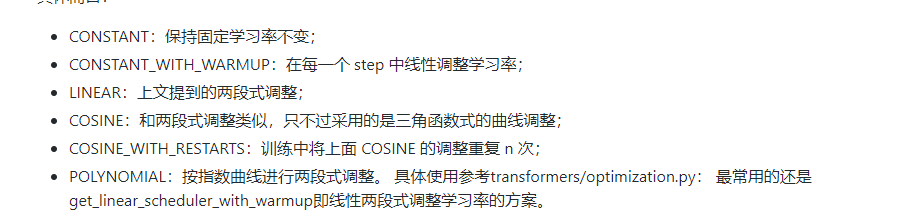